<a href="https://colab.research.google.com/github/ITriskMgr/INF6422/blob/main/INF6422_Lab_1_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# voici le code pour télécharger un fichier de données
from google.colab import files
uploaded = files.upload()

Saving anonops_short.txt to anonops_short.txt


In [1]:
# identifier la version de Python
from platform import python_version
print(python_version())

3.7.12


In [2]:
# Anomaly detection with Isolation Forest

In [3]:
pip install matplotlib pandas scipy

In [4]:
# Import the required libraries and set a random seed:
import numpy as np
import pandas as pd

random_seed = np.random.RandomState(12)

In [5]:
# Generate a set of normal observations, to be used as training data:
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=["x", "y"])

In [6]:
# Generate a testing set, also consisting of normal observations:
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

In [7]:
# Generate a set of outlier observations. These are generated from a different distribution than the normal observations:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

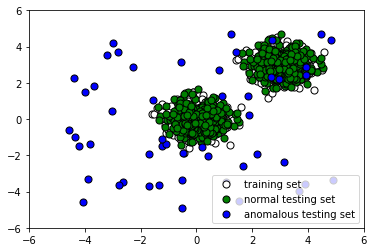

In [8]:
#  look at the data we have generated:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50, edgecolor="black")
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training set", "normal testing set", "anomalous testing set"],
    loc="lower right",
)

plt.show()

In [9]:
# train an Isolation Forest model on our training data:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [10]:
# see how the algorithm performs. Append the labels to X_outliers:
X_outliers = X_outliers.assign(pred=y_pred_outliers)
X_outliers.head()

,x,y,pred
0,3.947504,2.891003,-1
1,0.413976,-2.025841,-1
2,-2.644476,-3.480783,-1
3,-0.518212,-3.386443,-1
4,2.977669,2.215355,1


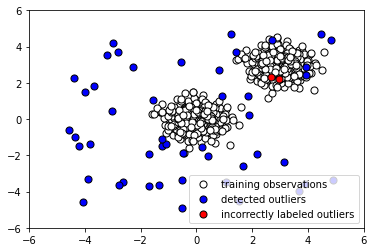

In [11]:
# plot the Isolation Forest predictions on the outliers to see how many it caught:
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_outliers.loc[X_outliers.pred == -1, ["x"]],
    X_outliers.loc[X_outliers.pred == -1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_outliers.loc[X_outliers.pred == 1, ["x"]],
    X_outliers.loc[X_outliers.pred == 1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training observations", "detected outliers", "incorrectly labeled outliers"],
    loc="lower right",
)

plt.show()

In [12]:
# see how it performed on the normal testing data. Append the predicted label to X_test:
X_test = X_test.assign(pred=y_pred_test)
X_test.head()

,x,y,pred
0,3.944575,3.866919,-1
1,2.984853,3.142150,1
2,3.501735,2.168262,-1
3,2.906300,3.233826,1
4,3.273225,3.261790,1


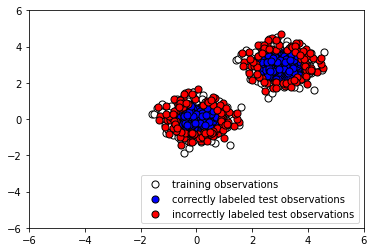

In [14]:
#  plot the results to see whether our classifier labeled the normal testing data correctly:
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_test.loc[X_test.pred == 1, ["x"]],
    X_test.loc[X_test.pred == 1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_test.loc[X_test.pred == -1, ["x"]],
    X_test.loc[X_test.pred == -1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    [
        "training observations",
        "correctly labeled test observations",
        "incorrectly labeled test observations",
    ],
    loc="lower right",
)

plt.show()

In [15]:
# Natural language processing using a hashing vectorizer and tf-idf with scikit-learn

In [16]:
pip install sklearn

In [ ]:
# ne pas oublier de télécharger les données

In [19]:
# import a textual dataset:
with open("anonops_short.txt", encoding="utf8") as f:
    anonops_chat_logs = f.readlines()

In [20]:
# count the words in the text using the hash vectorizer and then perform weighting using tf-idf:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

my_vector = HashingVectorizer(input="content", ngram_range=(1, 2))
X_train_counts = my_vector.fit_transform(anonops_chat_logs,)
tf_transformer = TfidfTransformer(use_idf=True,).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

In [22]:
# end result is a sparse matrix with each row being a vector representing one of the texts:

print(X_train_tf)

  (0, 938273)	0.10023429482560929
  (0, 871172)	-0.33044470291777067
  (0, 755834)	-0.2806123960092745
  (0, 556974)	-0.2171490773135763
  (0, 548264)	-0.09851435603064428
  (0, 531189)	-0.2566310842337745
  (0, 522961)	-0.3119912982467716
  (0, 514190)	-0.2527659565181208
  (0, 501800)	-0.33044470291777067
  (0, 499727)	-0.18952297847436425
  (0, 488876)	0.13502094828386488
  (0, 377854)	0.22710724511856722
  (0, 334594)	-0.25581186158424035
  (0, 256577)	0.20949022238574433
  (0, 197273)	-0.30119674850360456
  (0, 114899)	0.09713499033205285
  (0, 28523)	-0.3060506288368513
  (1, 960098)	0.09780838928665199
  (1, 955748)	-0.2747271490090429
  (1, 952302)	0.26070217969901804
  (1, 938273)	0.12095603891963835
  (1, 937092)	-0.2947114257264502
  (1, 927866)	0.21727726371674563
  (1, 820768)	-0.11065660403137358
  (1, 772066)	-0.14344517367198276
  :	:
  (180828, 329790)	0.06808618130417012
  (180828, 312887)	-0.08249409552977467
  (180828, 209871)	0.17685927011939476
  (180828, 193711)	

In [23]:
# Hyperparameter tuning with scikit-optimize

In [2]:
pip install scikit-learn==0.20.3 xgboost scikit-optimize pandas
# il faut possiblement sauvegarder et redémarrer le Colab

In [3]:
# Load the wine dataset from scikit-learn:
from sklearn import datasets

wine_dataset = datasets.load_wine()
X = wine_dataset.data
y = wine_dataset.target

In [17]:
print(X, y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [18]:
#Import XGBoost and stratified K-fold:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

In [19]:
# Import BayesSearchCV from scikit-optimize and specify the number of parameter settings to test:
from skopt import BayesSearchCV

n_iterations = 50

In [21]:
# Specify your estimator.
estimator = xgb.XGBClassifier(
    n_jobs=-1,
    objective="multi:softmax",
    eval_metric="merror",
    verbosity=0,
    num_class=len(set(y)),
)

In [22]:
# Specify a parameter search space:
search_space = {
    "learning_rate": (0.01, 1.0, "log-uniform"),
    "min_child_weight": (0, 10),
    "max_depth": (1, 50),
    "max_delta_step": (0, 10),
    "subsample": (0.01, 1.0, "uniform"),
    "colsample_bytree": (0.01, 1.0, "log-uniform"),
    "colsample_bylevel": (0.01, 1.0, "log-uniform"),
    "reg_lambda": (1e-9, 1000, "log-uniform"),
    "reg_alpha": (1e-9, 1.0, "log-uniform"),
    "gamma": (1e-9, 0.5, "log-uniform"),
    "min_child_weight": (0, 5),
    "n_estimators": (5, 5000),
    "scale_pos_weight": (1e-6, 500, "log-uniform"),
}

In [23]:
# Specify the type of cross-validation to perform:
cv = StratifiedKFold(n_splits=3, shuffle=True)

In [24]:
# Define BayesSearchCV using the settings you have defined:
bayes_cv_tuner = BayesSearchCV(
    estimator=estimator,
    search_spaces=search_space,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    n_iter=n_iterations,
    verbose=0,
    refit=True,
)


In [37]:
# Define a callback function to print out the progress of the parameter search:
import pandas as pd
import numpy as np


def print_status(optimal_result):
    """Shows the best parameters found and accuracy attained of the search so far."""
    models_tested = pd.DataFrame(bayes_cv_tuner.cv_results_)
    best_parameters_so_far = pd.Series(bayes_cv_tuner.best_params_)
    print(
        "Model #{}\nBest accuracy so far: {}\nBest parameters so far: {}\n".format(
            len(models_tested),
            np.round(bayes_cv_tuner.best_score_, 3),
            bayes_cv_tuner.best_params_,
        )
    )

    clf_type = bayes_cv_tuner.estimator.__class__.__name__
    models_tested.to_csv(clf_type + "_cv_results_summary.csv")

In [38]:
result = bayes_cv_tuner.fit(X, y, callback=print_status)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ValueError: ignored